In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  

import scipy.stats as stats  
import statsmodels.api as sm  

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 50)  

sns.set(style="whitegrid")  

%matplotlib inline

In [2]:
df = pd.read_excel(r'D:\Work\Data Analysis TFA\02 What Real Madrid Needs to Balance Defence and Attack\Real_Madrid_players_stats2025.xlsx')
print(df)

                 Player    Pos  Age  MP  Starts   Min   90s  Gls  Ast  G+A   
0         Kylian Mbappé     FW   26  28      28  2420  26.9   22    3   25  \
1     Federico Valverde  MF,DF   26  28      26  2313  25.7    5    3    8   
2      Thibaut Courtois     GK   32  24      24  2160  24.0    0    0    0   
3       Antonio Rüdiger     DF   32  27      24  2111  23.5    0    0    0   
4   Aurélien Tchouaméni  DF,MF   25  25      24  2094  23.3    0    0    0   
5       Jude Bellingham     MF   21  24      24  1983  22.0    8    7   15   
6       Vinicius Júnior     FW   24  24      20  1849  20.5   11    5   16   
7               Rodrygo  FW,MF   24  27      20  1772  19.7    6    5   11   
8         Lucas Vázquez     DF   33  25      20  1738  19.3    1    4    5   
9           Fran Garcia     DF   25  24      17  1569  17.4    0    2    2   
10          Brahim Díaz  FW,MF   25  25      14  1161  12.9    4    2    6   
11          Luka Modrić     MF   39  29      13  1422  15.8    2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          20 non-null     object 
 1   Pos             20 non-null     object 
 2   Age             20 non-null     int64  
 3   MP              20 non-null     int64  
 4   Starts          20 non-null     int64  
 5   Min             20 non-null     int64  
 6   90s             20 non-null     float64
 7   Gls             20 non-null     int64  
 8   Ast             20 non-null     int64  
 9   G+A             20 non-null     int64  
 10  G-PK            20 non-null     int64  
 11  PK              20 non-null     int64  
 12  PKatt           20 non-null     int64  
 13  xG              20 non-null     float64
 14  npxG            20 non-null     float64
 15  xAG             20 non-null     float64
 16  npxG+xAG        20 non-null     float64
 17  PrgC            20 non-null     int64

In [8]:
df.describe()

,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,TotalPassCmp,TotalPassAtt,TotalPassCmp%,TotDist,PrgDist,ShortPassCmp,ShortAttPass,ShortpassCmp%,MedPassCmp,MedAttPass,MedPassCmp%,CmpLongPass,AttLongPass,LongPassCmp%,Tkl,TklWon,Tkl in Def 3rd,TklMid3rd,TakAtt 3rd,ChallengeTkl,ChallengeAtt,ChallengeTkl%,ChallengesLost,Blocks,ShotBlocks,PassBlock,Int,Tkl+Int,Clr
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.0000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,18.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,26.95000,20.800000,16.300000,1455.850000,16.170000,3.100000,2.200000,5.300000,2.650000,0.450000,0.600000,2.960000,2.490000,2.095000,4.600000,38.150000,78.650000,77.650000,0.154000,0.141500,0.295000,0.136000,0.277000,0.154500,0.131000,0.287000,0.135000,0.2680,847.050000,958.60000,87.860000,14243.200000,4363.350000,409.250000,438.350000,93.635000,347.750000,375.900000,91.64500,68.6500,101.950000,68.260000,23.100000,14.150000,11.600000,8.100000,3.400000,10.500000,19.250000,53.488889,8.750000,13.450000,3.850000,9.600000,13.300000,36.400000,23.600000
std,4.80652,7.105224,7.233693,620.282387,6.898978,5.437685,2.015728,6.720746,4.171015,1.394538,1.698296,4.841313,3.587684,2.027047,5.286428,39.888364,51.232468,92.716475,0.218882,0.113753,0.276929,0.174277,0.240987,0.197203,0.104926,0.267308,0.153811,0.2292,411.530964,449.15891,4.456621,7534.902623,2862.464806,200.161481,213.490114,3.772236,209.411676,217.473023,5.02703,45.4941,68.127184,10.486402,13.533195,7.929127,7.199415,6.172093,3.218368,7.214751,11.836051,17.281166,5.729655,8.678315,4.693501,7.387044,12.486203,24.097172,24.416129
min,20.00000,5.000000,5.000000,450.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,143.000000,165.00000,74.500000,3544.000000,1419.000000,36.000000,37.000000,82.400000,69.000000,69.000000,79.90000,11.0000,17.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.00000,15.750000,10.750000,922.750000,10.225000,0.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.500000,1.050000,12.750000,43.500000,7.000000,0.000000,0.060000,0.087500,0.000000,0.087500,0.025000,0.047500,0.077500,0.025000,0.0775,573.250000,668.25000,86.300000,8858.750000,2179.750000,261.250000,274.750000,92.450000,191.750000,208.750000,87.77500,36.5000,57.750000,64.475000,17.000000,8.000000,7.000000,3.000000,0.750000,5.750000,12.000000,45.275000,3.750000,7.250000,0.000000,5.000000,4.000000,22.750000,6.750000
50%,26.00000,24.000000,15.500000,1495.500000,16.600000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.300000,1.300000,1.250000,1.800000,23.500000,76.500000,44.000000,0.075000,0.115000,0.205000,0.075000,0.205000,0.070000,0.125000,0.185000,0.070000,0.1850,752.000000,893.00000,87.500000,12348.500000,3709.000000,407.500000,419.000000,93.800000,315.000000,346.000000,92.85000,51.5000,78.000000,68.300000,19.000000,15.000000,13.000000,6.000000,3.000000,9.000000,16.000000,55.800000,10.000000,13.000000,3.000000,7.500000,10.000000,27.000000,16.000000
75%,29.75000,25.500000,24.000000,2010.750000,22.325000,4.250000,3.250000,6.500000,4.250000,0.000000,0.000000,2.400000,2.350000,3.125000,6.750000,50.500000,112.750000,114.750000,0.217500,0.217500,0.477500,0.217500,0.477500,0.210000,

In [9]:
df.head()

,Player,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,TotalPassCmp,TotalPassAtt,TotalPassCmp%,TotDist,PrgDist,ShortPassCmp,ShortAttPass,ShortpassCmp%,MedPassCmp,MedAttPass,MedPassCmp%,CmpLongPass,AttLongPass,LongPassCmp%,Tkl,TklWon,Tkl in Def 3rd,TklMid3rd,TakAtt 3rd,ChallengeTkl,ChallengeAtt,ChallengeTkl%,ChallengesLost,Blocks,ShotBlocks,PassBlock,Int,Tkl+Int,Clr
0,Kylian Mbappé,FW,26,28,28,2420,26.9,22,3,25,16,6,7,19.9,14.4,6.5,20.9,121,118,322,0.82,0.11,0.93,0.60,0.71,0.74,0.24,0.98,0.54,0.78,795,959,82.9,11602,2044,474,541,87.6,215,246,87.4,54,67,80.6,8,5,1,3,4,1,5,20.0,4,3,0,3,0,8,1
1,Federico Valverde,"MF,DF",26,28,26,2313,25.7,5,3,8,5,0,0,1.9,1.9,2.5,4.5,50,172,52,0.19,0.12,0.31,0.19,0.31,0.07,0.10,0.17,0.07,0.17,1537,1718,89.5,27159,7937,718,770,93.2,620,657,94.4,159,209,76.1,39,24,15,19,5,23,34,67.6,11,31,4,27,50,89,38
2,Thibaut Courtois,GK,32,24,24,2160,24.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,709,837,84.7,16122,10020,138,139,99.3,454,456,99.6,116,240,48.3,0,0,0,0,0,0,0,NaN,0,0,0,0,1,1,12
3,Antonio Rüdiger,DF,32,27,24,2111,23.5,0,0,0,0,0,0,1.7,1.7,0.2,1.9,19,84,4,0.00,0.00,0.00,0.00,0.00,0.07,0.01,0.08,0.07,0.08,1588,1729,91.8,29948,9809,589,609,96.7,823,864,95.3,157,222,70.7,18,11,12,6,0,10,14,71.4,4,21,13,8,8,26,86
4,Aurélien Tchouaméni,"DF,MF",25,25,24,2094,23.3,0,0,0,0,0,0,1.2,1.2,0.5,1.7,16,131,8,0.00,0.00,0.00,0.00,0.00,0.05,0.02,0.07,0.05,0.07,1518,1641,92.5,26774,8942,622,651,95.5,768,812,94.6,112,146,76.7,34,17,15,17,2,15,31,48.4,16,25,18,7,35,69,69


In [25]:
bg_color = "#1B0058"
text_color = "white"

In [16]:
defensive_columns = [
    'Tkl',                  # Total Tackles
    'TklWon',                 # Tackles Won
    'Tkl in Def 3rd',          # Tackles in Defensive Third
    'TklMid3rd',          # Tackles in Middle Third
    'TakAtt 3rd',          # Tackles in Attacking Third
    'ChallengeTkl',           # Total Challenges
    'ChallengeAtt',       # Challenges Won
    'Blocks',               # Total Blocks
    'ShotBlocks',    # Shot Blocks
    'Int',        # Interceptions
    'Clr',           # Clearances
]


In [17]:
attackers_positions = ['FW', 'FW,MF', 'LW', 'RW', 'CF', 'ST', 'MF']  
attacker_df = df[df['Pos'].isin(attackers_positions)].copy()

attacker_def_stats = attacker_df[['Player'] + defensive_columns]

Exploring the Relationship Between Total Tackles and Interceptions Among Real Madrid Attackers

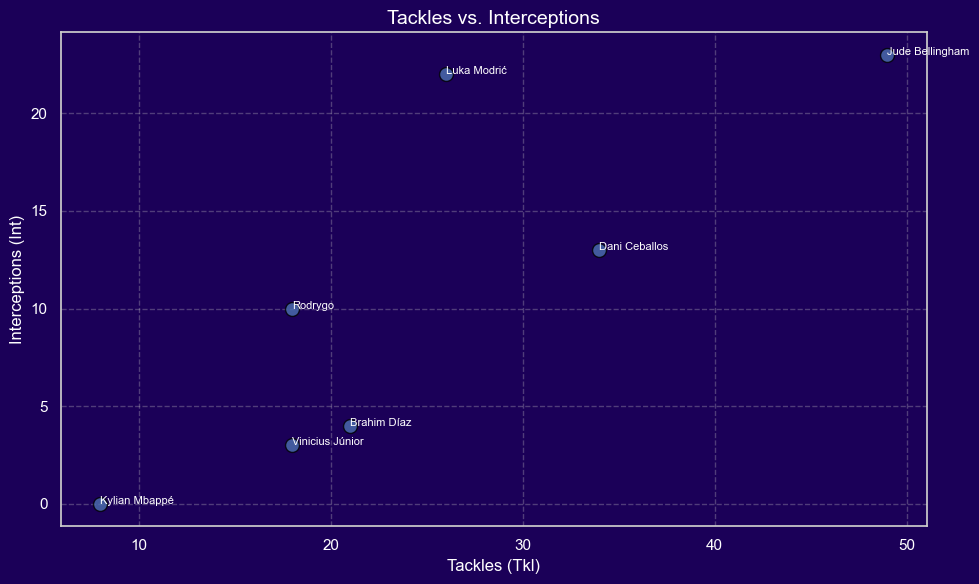

In [26]:
attackers_positions = ['FW', 'FW,MF', 'LW', 'RW', 'CF', 'ST', 'MF']  
attacker_df = df[df['Pos'].isin(attackers_positions)].copy()

attacker_def_stats = attacker_df[['Player'] + defensive_columns]


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    attacker_def_stats['Tkl'],
    attacker_def_stats['Int'],
    s=100,
    edgecolor='black',
    alpha=0.8
)

for _, row in attacker_def_stats.iterrows():
    plt.text(
        row['Tkl'],
        row['Int'],
        row['Player'],
        fontsize=8,
        color=text_color
    )

plt.title("Tackles vs. Interceptions", fontsize=14, color=text_color)
plt.xlabel("Tackles (Tkl)", color=text_color)
plt.ylabel("Interceptions (Int)", color=text_color)
plt.gca().set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)
plt.tick_params(colors=text_color)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Number of Defensive Third Tackles Made by Each Attacking Player During the 2025 Season

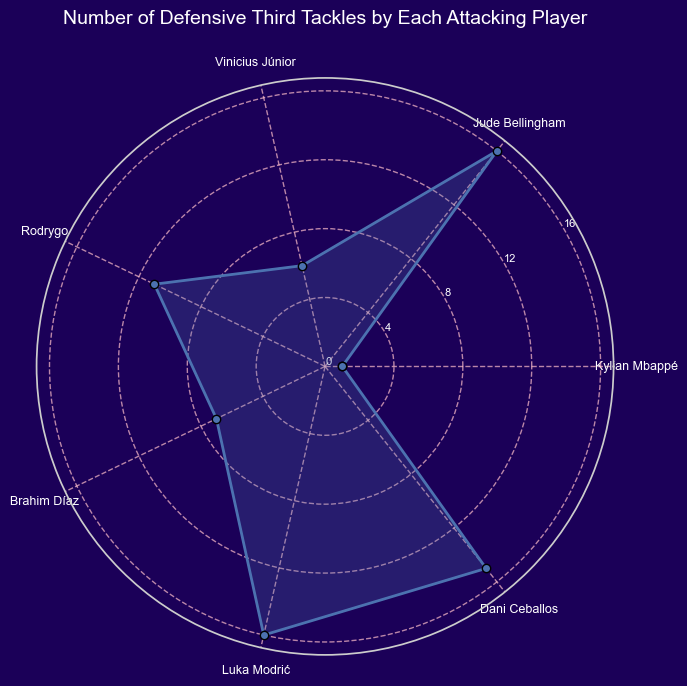

In [33]:
labels = attacker_def_stats['Player']
num_players = len(labels)

values = attacker_def_stats['Tkl in Def 3rd'].values

values = np.concatenate((values, [values[0]]))

angles = np.linspace(0, 2 * np.pi, num_players, endpoint=False).tolist()
angles += angles[:1] 

grid_color = "pink"

plt.figure(figsize=(12, 7))
ax = plt.subplot(111, polar=True)

ax.plot(
    angles,
    values,
    linewidth=2,
    linestyle='solid',
    marker='o',
    markeredgecolor='black'
)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color=text_color, fontsize=9)

ax.set_rlabel_position(30)
max_val = values.max()
radial_ticks = np.linspace(0, max_val, 5)
ax.set_yticks(radial_ticks)
ax.set_yticklabels([f"{int(t)}" for t in radial_ticks], color=text_color, fontsize=8)

ax.xaxis.grid(True, color=grid_color, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, color=grid_color, linestyle='--', alpha=0.7)

plt.title(
    "Number of Defensive Third Tackles by Each Attacking Player",
    fontsize=14,
    color=text_color,
    y=1.08
)

ax.set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)

ax.tick_params(colors=text_color)

plt.tight_layout()
plt.show()

Trend of Total Tackles Recorded by Attacking Players, Ordered by Defensive Contribution

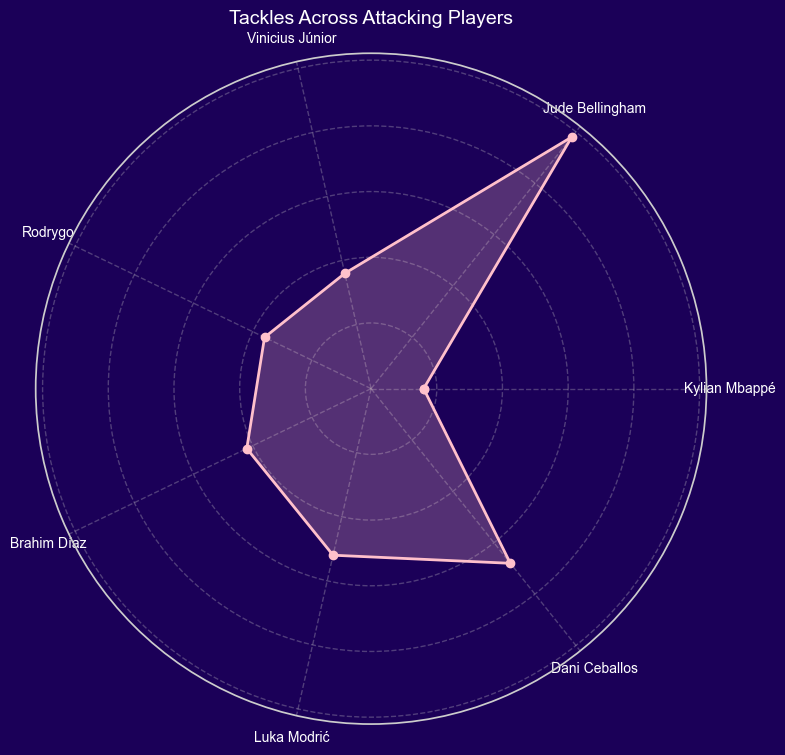

In [23]:
import matplotlib.pyplot as plt
import numpy as np

labels = attacker_def_stats['Player'].tolist()
values = attacker_def_stats['Tkl'].tolist()

num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='pink', linewidth=2, marker='o')
ax.fill(angles, values, color='pink', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color=text_color, fontsize=10)

ax.set_yticklabels([])
ax.set_title("Tackles Across Attacking Players", color=text_color, fontsize=14)
ax.set_facecolor(bg_color)
fig.patch.set_facecolor(bg_color)
ax.tick_params(colors=text_color)
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


Tackles vs. Successful Tackles with Bubble Size Representing Attacking Third Tackle Attempts

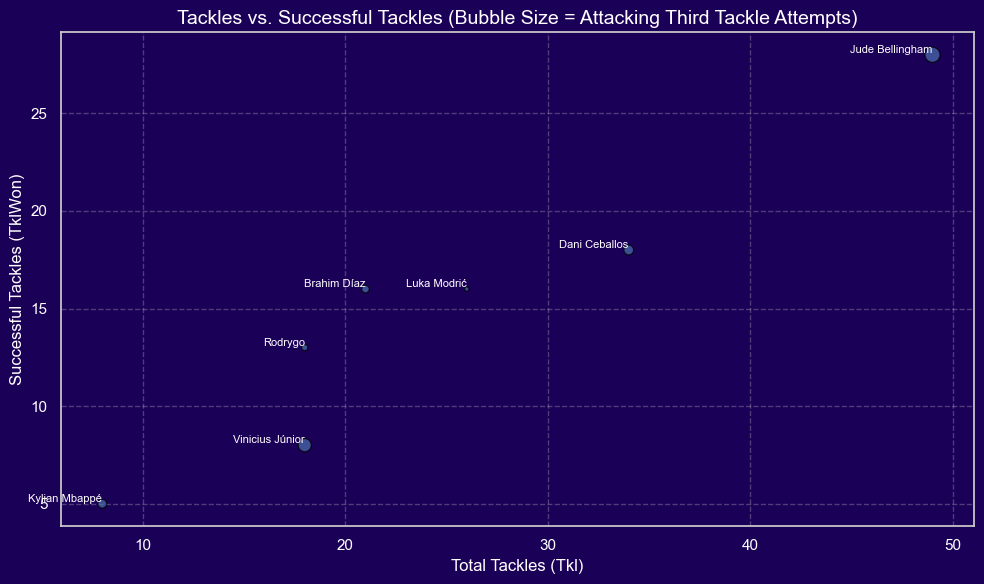

In [37]:
import matplotlib.pyplot as plt

sizes = attacker_def_stats['TakAtt 3rd'] * 10

plt.figure(figsize=(10, 6))
plt.scatter(
    attacker_def_stats['Tkl'],
    attacker_def_stats['TklWon'],
    s=sizes,
    edgecolor='black',
    alpha=0.7
)

for _, row in attacker_def_stats.iterrows():
    plt.text(
        row['Tkl'],
        row['TklWon'],
        row['Player'],
        fontsize=8,
        color=text_color,
        ha='right',
        va='bottom'
    )

plt.title(
    "Tackles vs. Successful Tackles (Bubble Size = Attacking Third Tackle Attempts)",
    fontsize=14,
    color=text_color
)
plt.xlabel("Total Tackles (Tkl)", color=text_color)
plt.ylabel("Successful Tackles (TklWon)", color=text_color)

plt.gca().set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)
plt.tick_params(colors=text_color)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


Stacked Comparison of Shot Blocks and Pass Blocks Achieved by Each Attacking Player

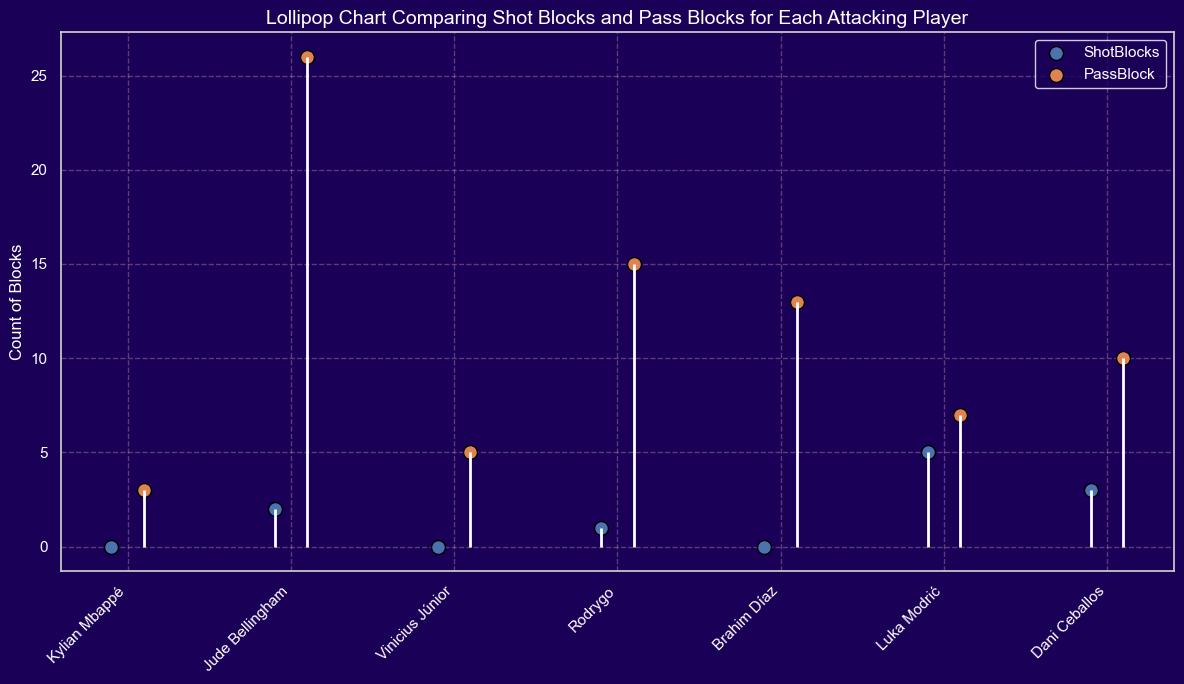

In [42]:
import matplotlib.pyplot as plt
import numpy as np

players = attacker_def_stats['Player']
shot_blocks = attacker_def_stats['ShotBlocks']
pass_blocks = attacker_def_stats['PassBlock']
indices = np.arange(len(players))

plt.figure(figsize=(12, 7))

plt.vlines(indices - 0.1, 0, shot_blocks, color='white', linewidth=2)
plt.scatter(indices - 0.1, shot_blocks, s=100, edgecolor='black', label='ShotBlocks')

plt.vlines(indices + 0.1, 0, pass_blocks, color='white', linewidth=2)
plt.scatter(indices + 0.1, pass_blocks, s=100, edgecolor='black', label='PassBlock')

plt.xticks(indices, players, rotation=45, ha='right', color=text_color)
plt.title(
    "Lollipop Chart Comparing Shot Blocks and Pass Blocks for Each Attacking Player",
    fontsize=14,
    color=text_color
)
plt.ylabel("Count of Blocks", color=text_color)

plt.gca().set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)
plt.tick_params(colors=text_color)
plt.legend(facecolor=bg_color, edgecolor='white', labelcolor=text_color)
plt.grid(True, linestyle='--', alpha=0.3, color='pink')

plt.tight_layout()
plt.show()


Statistical Distribution of Interceptions Recorded by Attacking Players in the 2025 Campaign

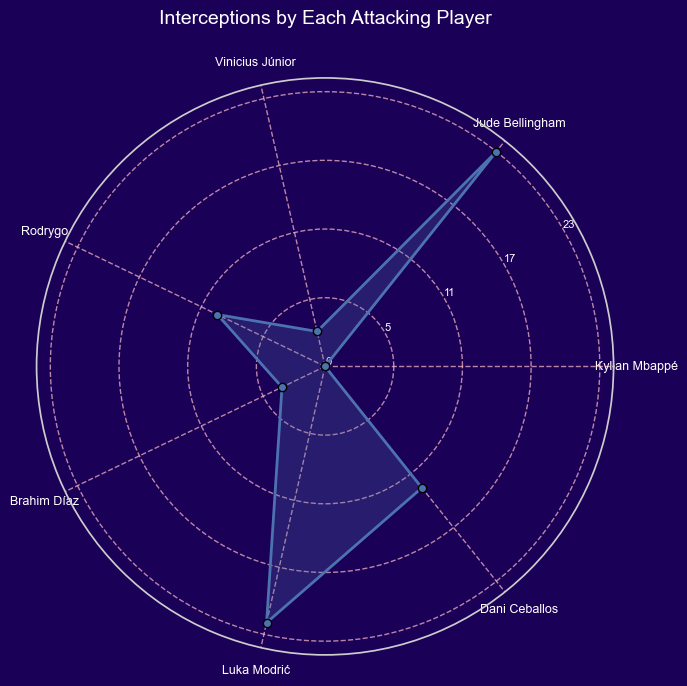

In [18]:
labels = attacker_def_stats['Player']
num_players = len(labels)

values = attacker_def_stats['Int'].values
values = np.concatenate((values, [values[0]]))  # Loop back to first player

angles = np.linspace(0, 2 * np.pi, num_players, endpoint=False).tolist()
angles += angles[:1] 

grid_color = "pink"

plt.figure(figsize=(12, 7))
ax = plt.subplot(111, polar=True)

ax.plot(
    angles,
    values,
    linewidth=2,
    linestyle='solid',
    marker='o',
    markeredgecolor='black'
)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color=text_color, fontsize=9)

ax.set_rlabel_position(30)
max_val = values.max()
radial_ticks = np.linspace(0, max_val, 5)
ax.set_yticks(radial_ticks)
ax.set_yticklabels([f"{int(t)}" for t in radial_ticks], color=text_color, fontsize=8)

ax.xaxis.grid(True, color=grid_color, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, color=grid_color, linestyle='--', alpha=0.7)

plt.title(
    "Interceptions by Each Attacking Player",
    fontsize=14,
    color=text_color,
    y=1.08
)

ax.set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)

ax.tick_params(colors=text_color)

plt.tight_layout()
plt.show()


Progressive Passes by Real Madrid Defenders

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bg_color = "#1B0058"
text_color = "white"

data = {
    'Player': ['Rüdiger', 'Carvajal', 'Fran García', 'Mendy', 'Nacho', 'Alaba'],
    'Goals': [2, 2, 1, 0, 0, 0],
    'Shots on Target': [3, 5, 3, 1, 1, 1],
    'Key Passes': [4, 7, 7, 4, 3, 2],
    'Assists': [0, 2, 3, 1, 0, 0],
    'Progressive Passes': [43, 63, 47, 36, 27, 37],
    'Passes into Final Third': [23, 37, 34, 22, 20, 27],
    'Shot-Creating Actions': [9, 26, 21, 10, 5, 5]
}

defenders_stats = pd.DataFrame(data)


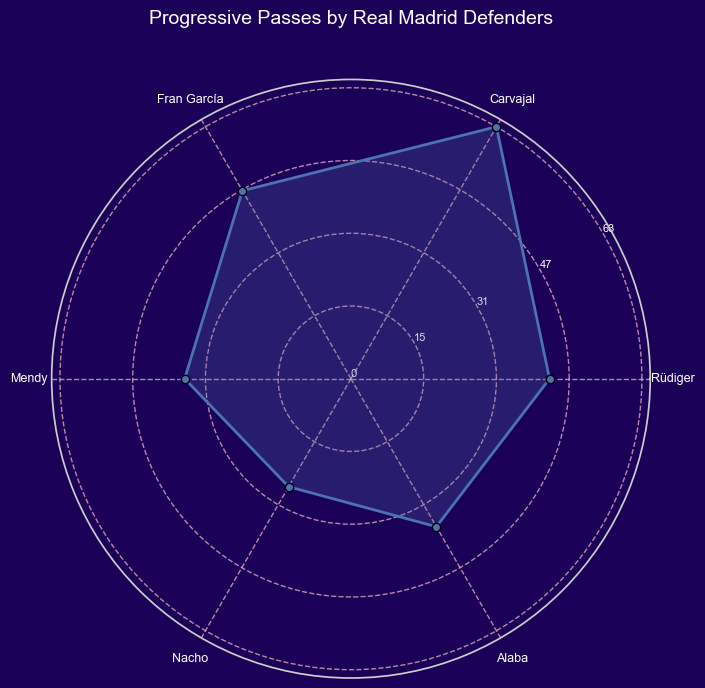

In [10]:
labels = defenders_stats['Player']
num_players = len(labels)

values = defenders_stats['Progressive Passes'].values
values = np.concatenate((values, [values[0]]))

angles = np.linspace(0, 2 * np.pi, num_players, endpoint=False).tolist()
angles += angles[:1]

grid_color = "pink"

plt.figure(figsize=(12, 7))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=2, linestyle='solid', marker='o', markeredgecolor='black')
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color=text_color, fontsize=9)

ax.set_rlabel_position(30)
max_val = values.max()
radial_ticks = np.linspace(0, max_val, 5)
ax.set_yticks(radial_ticks)
ax.set_yticklabels([f"{int(t)}" for t in radial_ticks], color=text_color, fontsize=8)

ax.xaxis.grid(True, color=grid_color, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, color=grid_color, linestyle='--', alpha=0.7)

plt.title("Progressive Passes by Real Madrid Defenders", fontsize=14, color=text_color, y=1.08)

ax.set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)

ax.tick_params(colors=text_color)

plt.tight_layout()
plt.show()

Passes into Final Third by Real Madrid Defenders

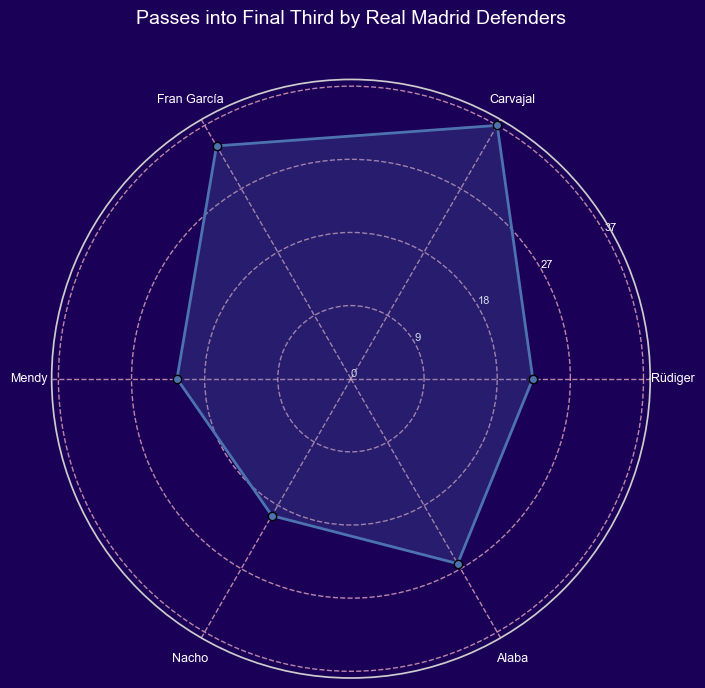

In [12]:
labels = defenders_stats['Player']
num_players = len(labels)

values = defenders_stats['Passes into Final Third'].values
values = np.concatenate((values, [values[0]]))

angles = np.linspace(0, 2 * np.pi, num_players, endpoint=False).tolist()
angles += angles[:1]

grid_color = "pink"

plt.figure(figsize=(12, 7))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=2, linestyle='solid', marker='o', markeredgecolor='black')
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color=text_color, fontsize=9)

ax.set_rlabel_position(30)
max_val = values.max()
radial_ticks = np.linspace(0, max_val, 5)
ax.set_yticks(radial_ticks)
ax.set_yticklabels([f"{int(t)}" for t in radial_ticks], color=text_color, fontsize=8)

ax.xaxis.grid(True, color=grid_color, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, color=grid_color, linestyle='--', alpha=0.7)

plt.title("Passes into Final Third by Real Madrid Defenders", fontsize=14, color=text_color, y=1.08)

ax.set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)

ax.tick_params(colors=text_color)

plt.tight_layout()
plt.show()


Shot-Creating Actions by Real Madrid Defenders

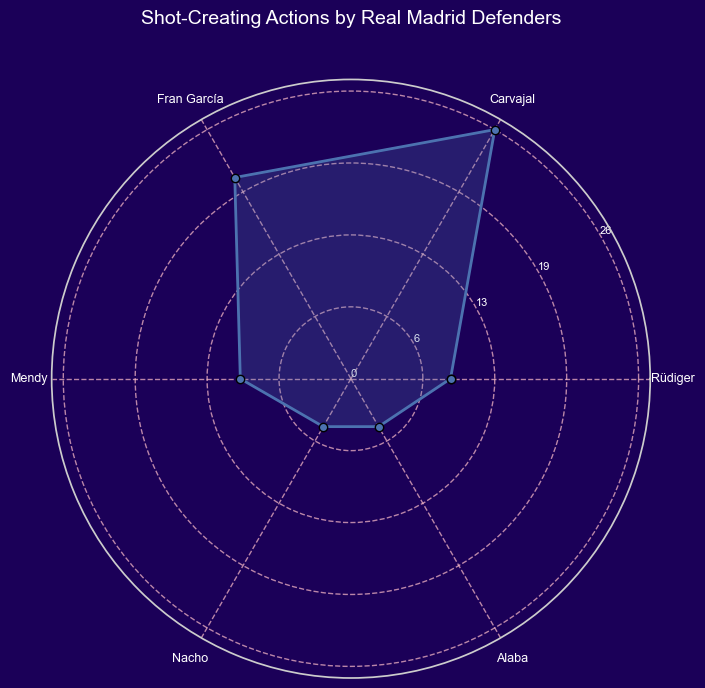

In [11]:
labels = defenders_stats['Player']
num_players = len(labels)

values = defenders_stats['Shot-Creating Actions'].values
values = np.concatenate((values, [values[0]]))

angles = np.linspace(0, 2 * np.pi, num_players, endpoint=False).tolist()
angles += angles[:1]

grid_color = "pink"

plt.figure(figsize=(12, 7))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=2, linestyle='solid', marker='o', markeredgecolor='black')
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color=text_color, fontsize=9)

ax.set_rlabel_position(30)
max_val = values.max()
radial_ticks = np.linspace(0, max_val, 5)
ax.set_yticks(radial_ticks)
ax.set_yticklabels([f"{int(t)}" for t in radial_ticks], color=text_color, fontsize=8)

ax.xaxis.grid(True, color=grid_color, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, color=grid_color, linestyle='--', alpha=0.7)

plt.title("Shot-Creating Actions by Real Madrid Defenders", fontsize=14, color=text_color, y=1.08)

ax.set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)

ax.tick_params(colors=text_color)

plt.tight_layout()
plt.show()
